In [1]:
"""
Created on Mon Jun 29 11:39:00 2020

@author: Stephanie DeMaria

"""
import sklearn
import shap
import pandas as pd

In [2]:
shap.initjs()
ibmData = pd.read_csv('IBM-HR-Employee-Attrition2-Numeric.csv') #Load in the version with dummy variables representing categorical variables
X = pd.DataFrame(ibmData) #Convert the dataset to a pandas dataframe
y = pd.DataFrame(ibmData['Attrition']) #Create another dataframe for the attrition variable
X = X.drop(columns = ['Attrition', 'Over18']) #Remove the attrition column
X.head()

y = y.to_numpy() #Convert the dataframe to a numpy array
print(y)

[[1]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


[Text(164.40419694767442, 210.192, 'X[20] <= 0.5\ngini = 0.276\nsamples = 1176\nvalue = [982, 194]'),
 Text(70.81449854651163, 195.696, 'X[26] <= 2.5\ngini = 0.186\nsamples = 839\nvalue = [752, 87]'),
 Text(10.38139534883721, 181.2, 'X[14] <= 2.5\ngini = 0.444\nsamples = 75\nvalue = [50, 25]'),
 Text(5.190697674418605, 166.704, 'X[6] <= 5.0\ngini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(2.5953488372093023, 152.208, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(7.786046511627907, 152.208, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(15.572093023255814, 166.704, 'X[9] <= 1.5\ngini = 0.496\nsamples = 53\nvalue = [29, 24]'),
 Text(12.976744186046512, 152.208, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(18.167441860465118, 152.208, 'X[16] <= 0.5\ngini = 0.466\nsamples = 46\nvalue = [29, 17]'),
 Text(11.67906976744186, 137.712, 'X[2] <= 517.0\ngini = 0.465\nsamples = 19\nvalue = [7, 12]'),
 Text(9.083720930232559, 123.216, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(14.274418604651164, 123.216, 'X[17] <= 1449.5\ngini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(9.083720930232559, 108.72, 'X[26] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(6.488372093023256, 94.22399999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(11.67906976744186, 94.22399999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(19.46511627906977, 108.72, 'X[1] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(16.869767441860464, 94.22399999999999, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(22.06046511627907, 94.22399999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(24.655813953488373, 137.712, 'X[4] <= 8.5\ngini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(22.06046511627907, 123.216, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(27.251162790697673, 123.216, 'X[28] <= 2.5\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(24.655813953488373, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(29.846511627906978, 108.72, 'X[36] <= 12.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(27.251162790697673, 94.22399999999999, 'X[5] <= 3.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(24.655813953488373, 79.72799999999998, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(29.846511627906978, 79.72799999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(32.44186046511628, 94.22399999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(131.24760174418606, 181.2, 'X[19] <= 4.5\ngini = 0.149\nsamples = 764\nvalue = [702, 62]'),
 Text(89.25566860465116, 166.704, 'X[26] <= 38.5\ngini = 0.11\nsamples = 584\nvalue = [550, 34]'),
 Text(86.66031976744186, 152.208, 'X[23] <= 1.5\ngini = 0.107\nsamples = 583\nvalue = [550, 33]'),
 Text(54.82674418604651, 137.712, 'X[2] <= 114.5\ngini = 0.198\nsamples = 126\nvalue = [112, 14]'),
 Text(52.23139534883721, 123.216, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(57.42209302325581, 123.216, 'X[37] <= 2.5\ngini = 0.186\nsamples = 125\nvalue = [112, 13]'),
 Text(42.82325581395349, 108.72, 'X[21] <= 13.5\ngini = 0.353\nsamples = 35\nvalue = [27, 8]'),
 Text(37.632558139534886, 94.22399999999999, 'X[29] <= 6.0\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(35.03720930232558, 79.72799999999998, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(40.22790697674419, 79.72799999999998, 'X[17] <= 7931.0\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(37.632558139534886, 65.232, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(42.82325581395349, 65.232, 'X[36] <= 5.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(40.22790697674419, 50.73599999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(45.41860465116279, 50.73599999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(48.013953488372096, 94.22399999999999, 'X[2] <= 1472.0\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(45.41860465116279, 79.72799999999998, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(50.609302325581396, 79.727999

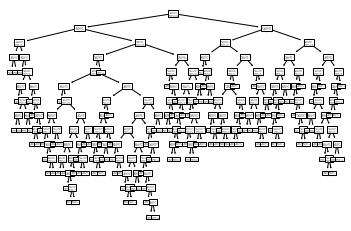

In [3]:
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y.ravel(), test_size=0.2, random_state=7)
model = sklearn.tree.DecisionTreeClassifier().fit(X_train,y_train)
sklearn.tree.plot_tree(model) 

In [14]:
probabilities = model.predict_proba(X_valid)
probList = []
for i in range(len(X_valid)):
    #print(probabilities[i][1])
    probList.append(probabilities[i][1])
#print(probList)
ibmProbData = pd.DataFrame(probList)
#ibmProbData.to_csv('ibmTreeProbs.csv')
model.score(X_valid, y_valid) #Accuracy Score

0.7891156462585034

In [9]:
explainer = shap.TreeExplainer(model) #Use the TreeExplainer built into SHAP to create the explainer
shap_values = explainer.shap_values(X_valid) #Gets the shap values from the explainer

In [10]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_valid)
#Colors = feature value (red = high, blue = low)
#Instances with a lot of blue are less likely to attrite

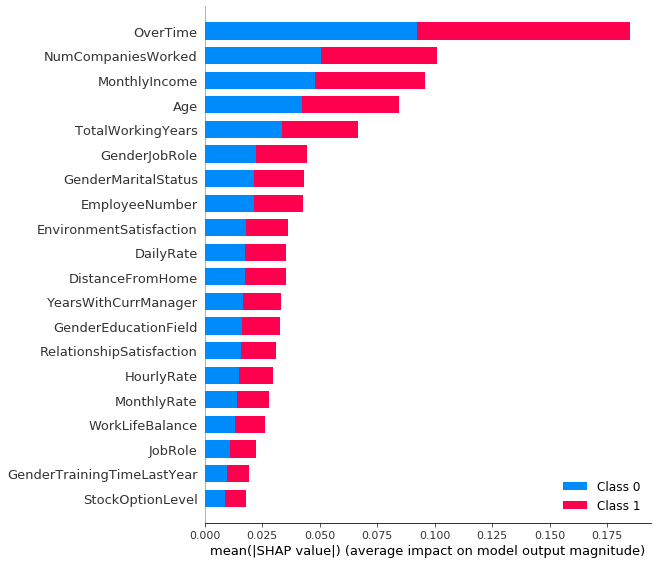

In [11]:
shap.summary_plot(shap_values, X_valid)

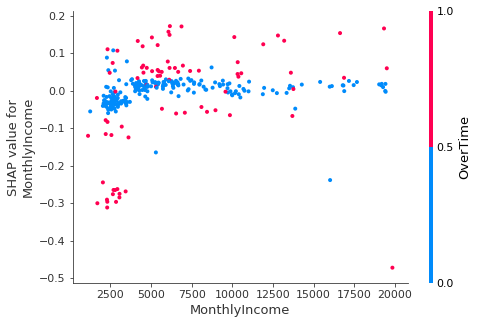

In [12]:
shap.dependence_plot("MonthlyIncome", shap_values[0], X_valid)
#This plot shows that employees with a monthly income less than 10000 are more likely to have a low overtime value. 
#The overtime value is an important feature in determining Attrition. 

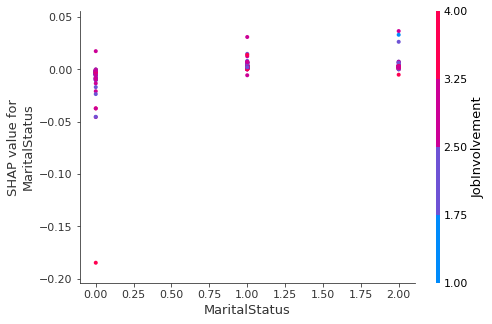

In [13]:
shap.dependence_plot("MaritalStatus", shap_values[0], X_valid)